In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [3]:
#Load the Dataset
df=pd.read_csv('ai4i2020.csv')
pd.set_option('display.max_columns', None)
df.head()

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1551         42.8                0                0    0   
1                    1408         46.3                3                0    0   
2                    1498         49.4                5                0    0   
3                    1433         39.5                7                0    0   
4                    1408         40.0                9                0    0   

   HDF  PWF  OSF  RNF  
0    0    0    0    0  
1    0    0    0    0  
2    0    0    0    0  
3    0    0    0    0  
4    0    0    0    0

## Exploratory Data Analysis (EDA)

In [4]:
print(f"Shape of the dataset: {df.shape}")

Shape of the dataset: (10000, 14)


It has 10000 rows and 14 columns

In [5]:
# Info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

It has categorical datatypes are Product ID,Type and others are float and integer datatype

In [6]:
# Null Values
print(df.isnull().sum())


UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64


There are no  missing values are present

In [7]:
# Check for duplicates
df.duplicated().sum()

0

There are no duplicate values are present

In [8]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
numerical_features

['UDI',
 'Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'Machine failure',
 'TWF',
 'HDF',
 'PWF',
 'OSF',
 'RNF']

In [9]:
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
categorical_features

['Product ID', 'Type']

# Descriptive Statistics

In [10]:
# Display summary statistics for numerical columns
df.describe()

UDI  Air temperature [K]  Process temperature [K]  \
count  10000.00000         10000.000000             10000.000000   
mean    5000.50000           300.004930               310.005560   
std     2886.89568             2.000259                 1.483734   
min        1.00000           295.300000               305.700000   
25%     2500.75000           298.300000               308.800000   
50%     5000.50000           300.100000               310.100000   
75%     7500.25000           301.500000               311.100000   
max    10000.00000           304.500000               313.800000   

       Rotational speed [rpm]   Torque [Nm]  Tool wear [min]  Machine failure  \
count            10000.000000  10000.000000     10000.000000     10000.000000   
mean              1538.776100     39.986910       107.951000         0.033900   
std                179.284096      9.968934        63.654147         0.180981   
min               1168.000000      3.800000         0.000000         0.000000   
25%               1423.000000     33.200000        53.000000         0.000000   
50%               1503.000000     40.100000       108.000000         0.000000   
75%               1612.000000     46.800000       162.000000         0.000000   
max               2886.000000     76.600000       253.000000         1.000000   

                TWF           HDF           PWF           OSF          RNF  
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.00000  
mean       0.004600      0.011500      0.009500      0.009800      0.00190  
std        0.067671      0.106625      0.097009      0.098514      0.04355  
min        0.000000      0.000000      0.000000      0.000000      0.00000  
25%        0.000000      0.000000      0.000000      0.000000      0.00000  
50%        0.000000      0.000000      0.000000      0.000000      0.00000  
75%        0.000000      0.000000      0.000000      0.000000      0.00000  
max        1.000000      1.000000      1.000000      1.000000      1.00000

A summary of the statistics for numerical features:

* Air temperature [K]: Mean = 300.0, Std = 2.0
* Process temperature [K]: Mean = 310.0, Std = 1.48
* Rotational speed [rpm]: Mean = 1538.78, Std = 179.28
* Torque [Nm]: Mean = 39.99, Std = 9.97
* Tool wear [min]: Mean = 107.95, Std = 63.65

In [11]:
failure_rate = df['Machine failure'].mean() * 100
print(f'Machine Failure Rate: {failure_rate:.2f}%')

Machine Failure Rate: 3.39%


In [12]:
df['Machine failure'].value_counts()

Machine failure
0    9661
1     339
Name: count, dtype: int64

In [13]:
# for checking the names of columns
df.columns


Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

## Feature Engineering

In [14]:
## Product ID and UDI are not needed
df.drop(['UDI', 'Product ID'],axis=1,inplace=True)

In [15]:
df['Type'].value_counts()

Type
L    6000
M    2997
H    1003
Name: count, dtype: int64

C:\Users\HP\AppData\Local\Temp\ipykernel_804\112725707.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=countf.index, y=countf.values, errorbar=None, palette="Set1")


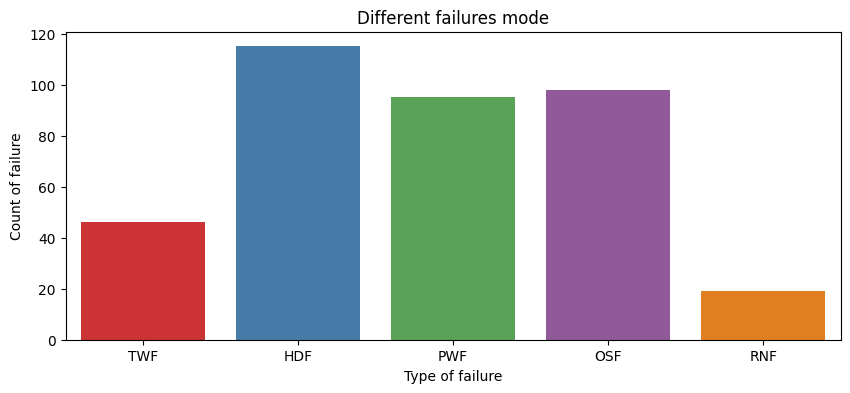

In [16]:
# visualizing the failure mode
df5 = df[['TWF', 'HDF', 'PWF', 'OSF', 'RNF']]
countf = df5.sum()
plt.figure(figsize=(10, 4))
plt.title('Different failures mode')
plt.xlabel('Type of failure')
plt.ylabel('Count of failure')
sns.barplot(x=countf.index, y=countf.values, errorbar=None, palette="Set1")
plt.show()

high chances of machine failure are Heat disspation ,power failure and overstrain

In [17]:
df['Machine failure'] = 0
df.loc[df['TWF'] == 1, 'Machine failure'] = 1
df.loc[df['HDF'] == 1, 'Machine failure'] = 2
df.loc[df['PWF'] == 1, 'Machine failure'] = 3
df.loc[df['OSF'] == 1, 'Machine failure'] = 4
df.loc[df['RNF'] == 1, 'Machine failure'] = 5
df.drop(['TWF', 'HDF', 'PWF', 'OSF', 'RNF'], axis=1, inplace=True)

In [18]:
df['Machine failure'].value_counts()

Machine failure
0    9652
2     106
4      98
3      83
1      42
5      19
Name: count, dtype: int64

In [19]:

# Temperature Difference
df['Temperature Difference'] = df['Process temperature [K]'] - df['Air temperature [K]']

# Power Interaction
df['Power'] = df['Rotational speed [rpm]'] * df['Torque [Nm]']

# Mean Temperature
df['Mean Temperature'] = (df['Air temperature [K]'] + df['Process temperature [K]']) / 2

# Wear Rate
df['Wear strain'] = df['Tool wear [min]'] * df['Torque [Nm]']

df.head()


Type  Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0    M                298.1                    308.6                    1551   
1    L                298.2                    308.7                    1408   
2    L                298.1                    308.5                    1498   
3    L                298.2                    308.6                    1433   
4    L                298.2                    308.7                    1408   

   Torque [Nm]  Tool wear [min]  Machine failure  Temperature Difference  \
0         42.8                0                0                    10.5   
1         46.3                3                0                    10.5   
2         49.4                5                0                    10.4   
3         39.5                7                0                    10.4   
4         40.0                9                0                    10.5   

     Power  Mean Temperature  Wear strain  
0  66382.8            303.35          0.0  
1  65190.4            303.45        138.9  
2  74001.2            303.30        247.0  
3  56603.5            303.40        276.5  
4  56320.0            303.45        360.0

## Data visualisation

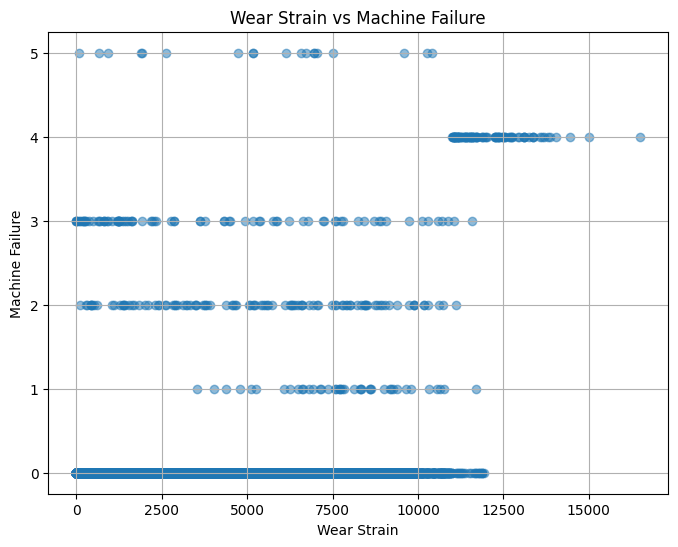

In [20]:

plt.figure(figsize=(8, 6))
plt.scatter(df['Wear strain'], df['Machine failure'], alpha=0.5)
plt.title('Wear Strain vs Machine Failure')
plt.xlabel('Wear Strain')
plt.ylabel('Machine Failure')
plt.grid(True)
plt.show()


this graph clearly shows the overstrain failure which is 4 here is high on wear strain increases


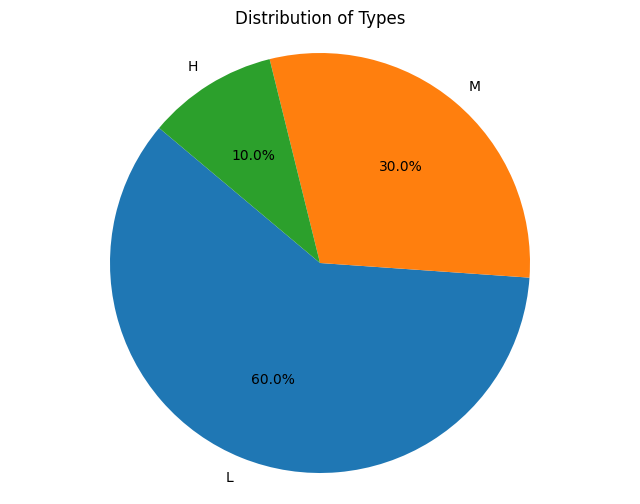

In [21]:
type_counts = df['Type'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Types')
plt.axis('equal')
plt.show()

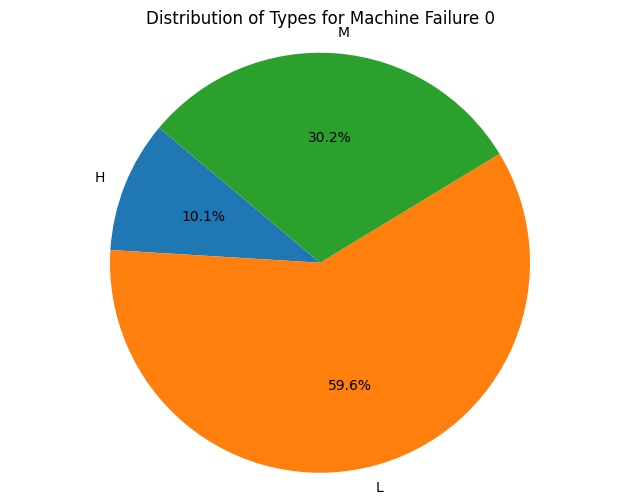

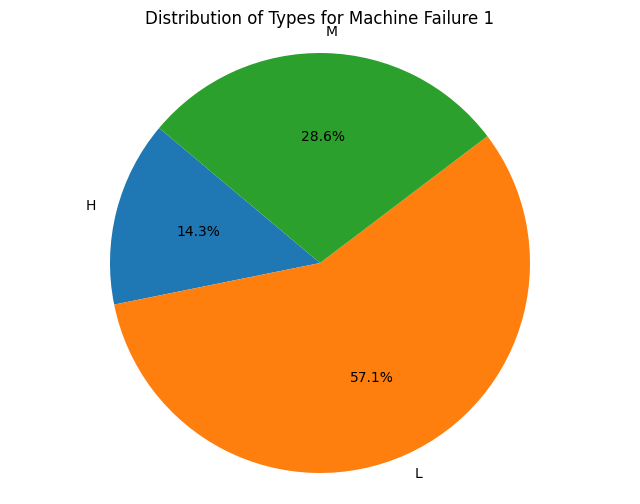

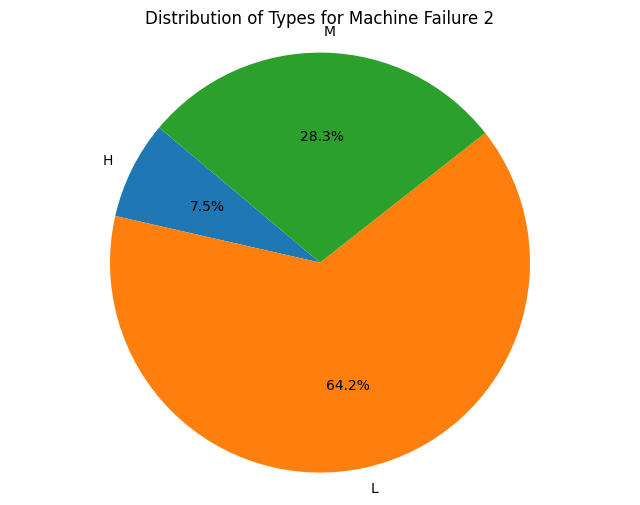

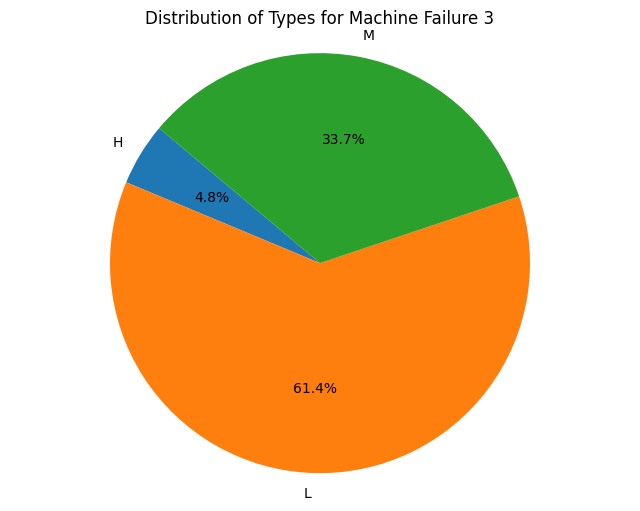

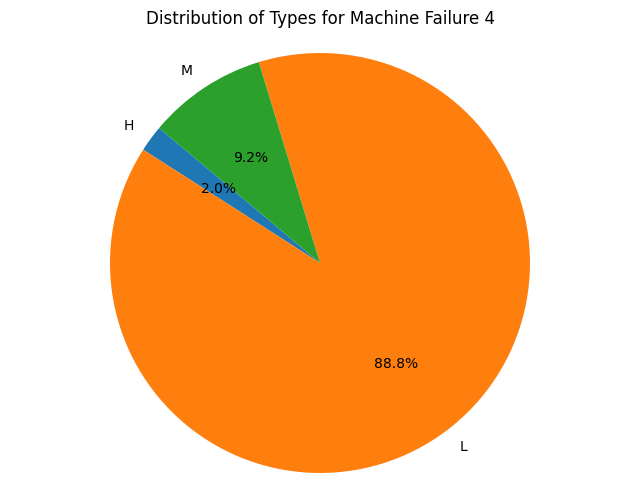

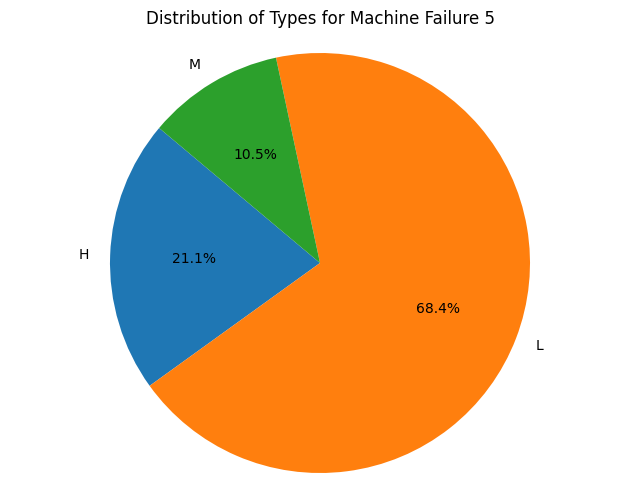

In [22]:

type_failure_counts = df.groupby(['Machine failure', 'Type']).size().unstack(fill_value=0)

# Plot pie charts for each 'Machine failure' category
for failure in type_failure_counts.index:
    plt.figure(figsize=(8, 6))
    type_failure_counts.loc[failure].plot.pie(autopct='%1.1f%%', startangle=140)
    plt.title(f'Distribution of Types for Machine Failure {failure}')
    plt.ylabel('')
    plt.axis('equal')
    plt.show()

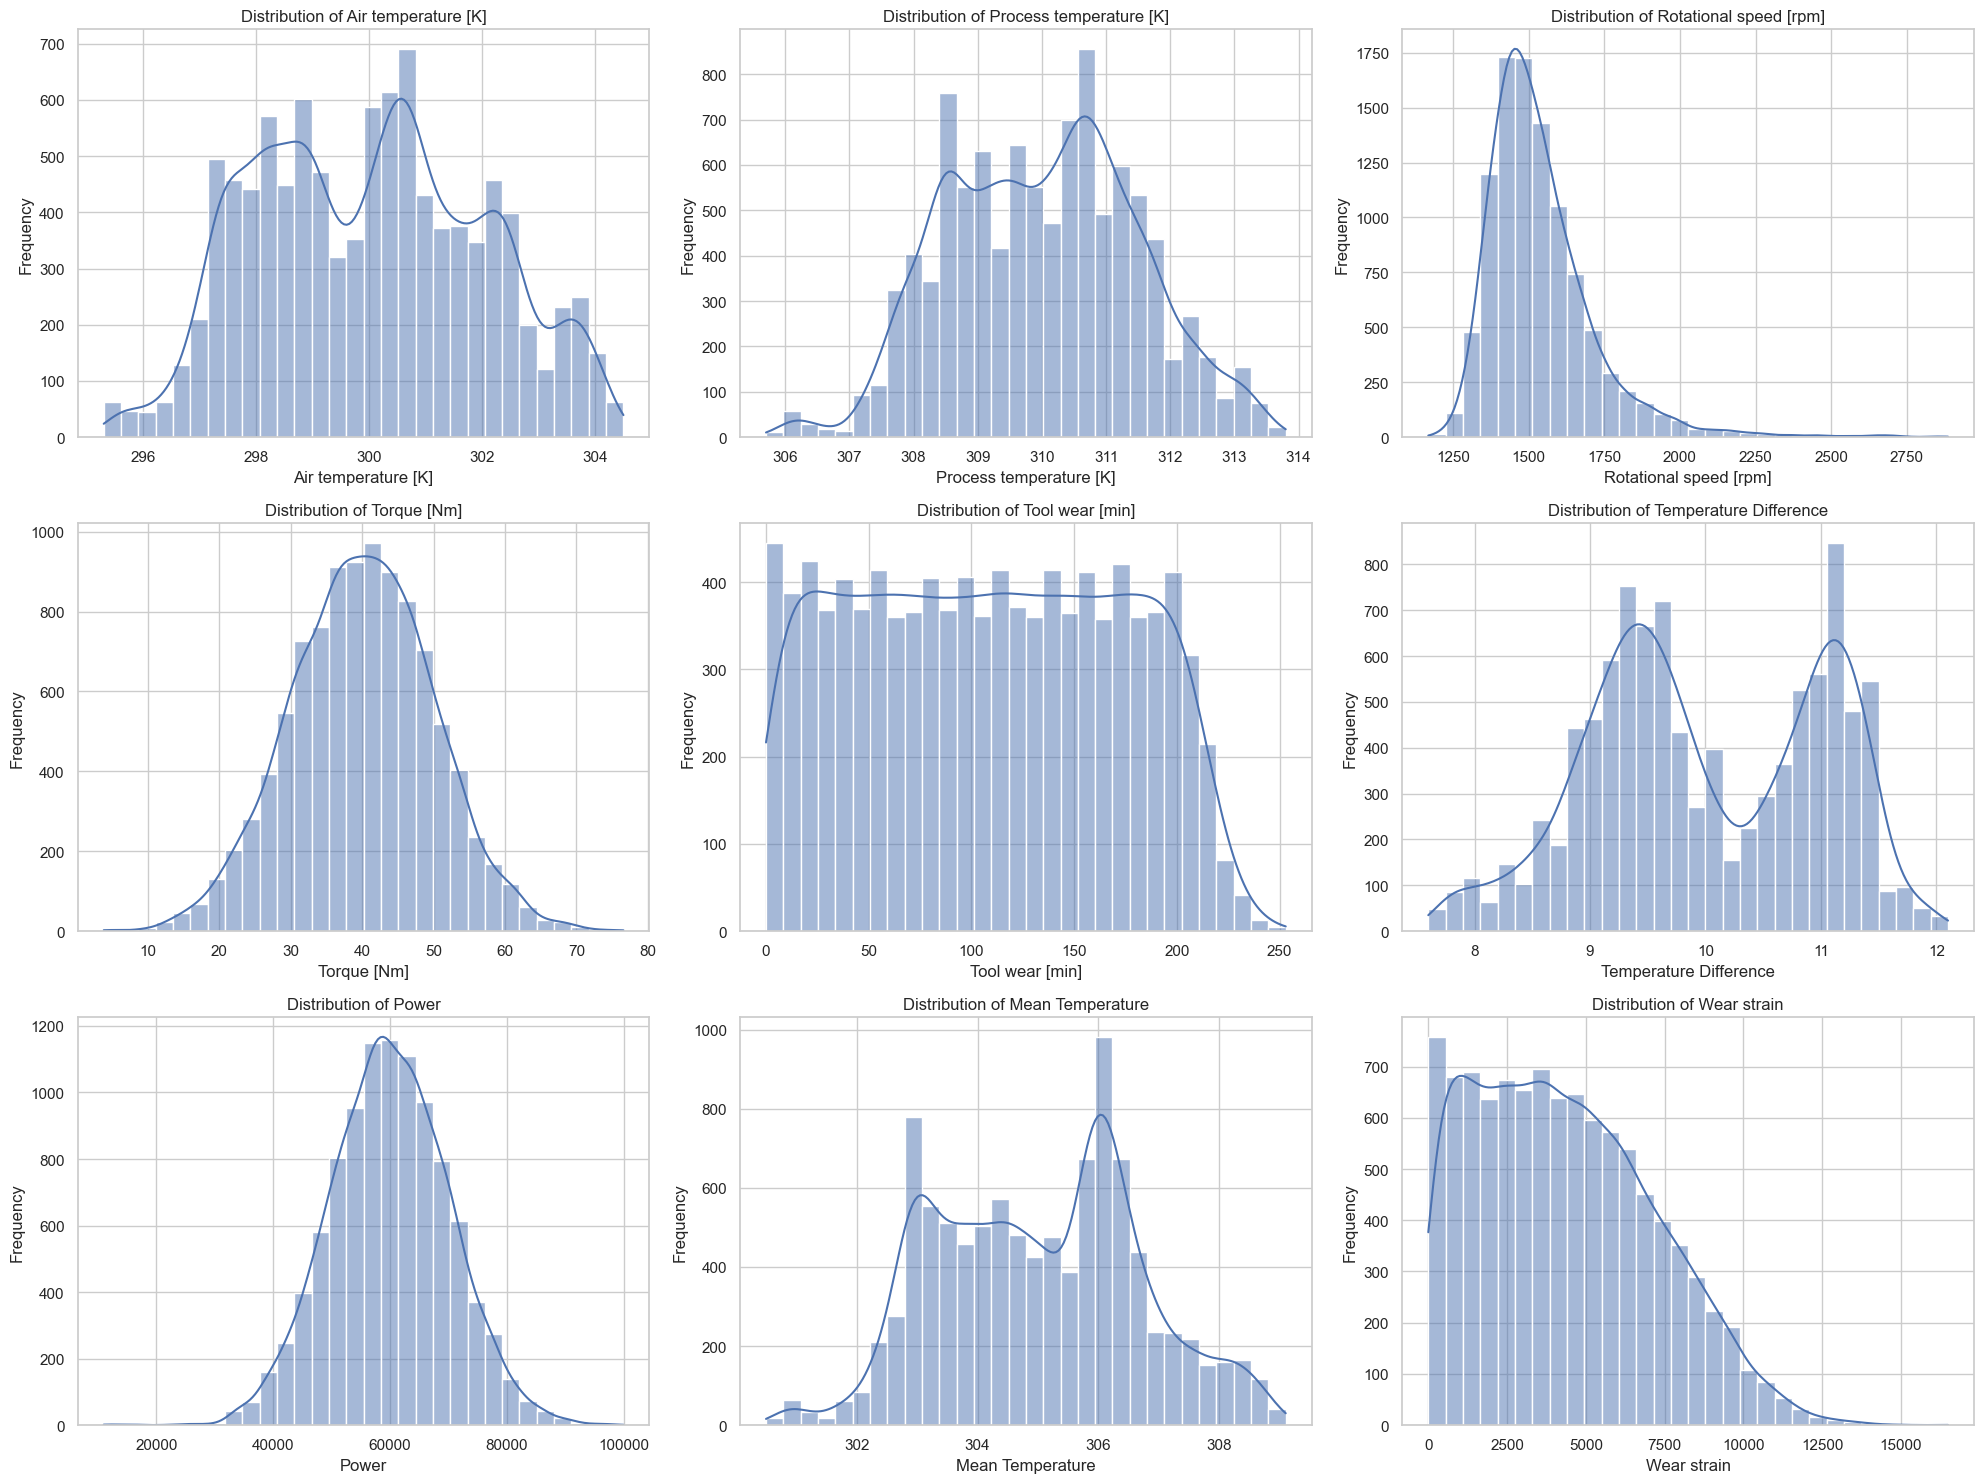

In [23]:
#Histogram for numerical features
sns.set(style="whitegrid")

features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]','Torque [Nm]',
            'Tool wear [min]', 'Temperature Difference', 'Power','Mean Temperature', 'Wear strain']

plt.figure(figsize=(20, 15))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

* Air temperature [K]: Approximately normally distributed with a mean around 300 K.
* Process temperature [K]: Approximately normally distributed with a mean around 310 K.
* Rotational speed [rpm]: Slightly left-skewed, with most values between 1200 and 1800 rpm.
* Torque [Nm]: Normally distributed with most values between 20 and 60 Nm.


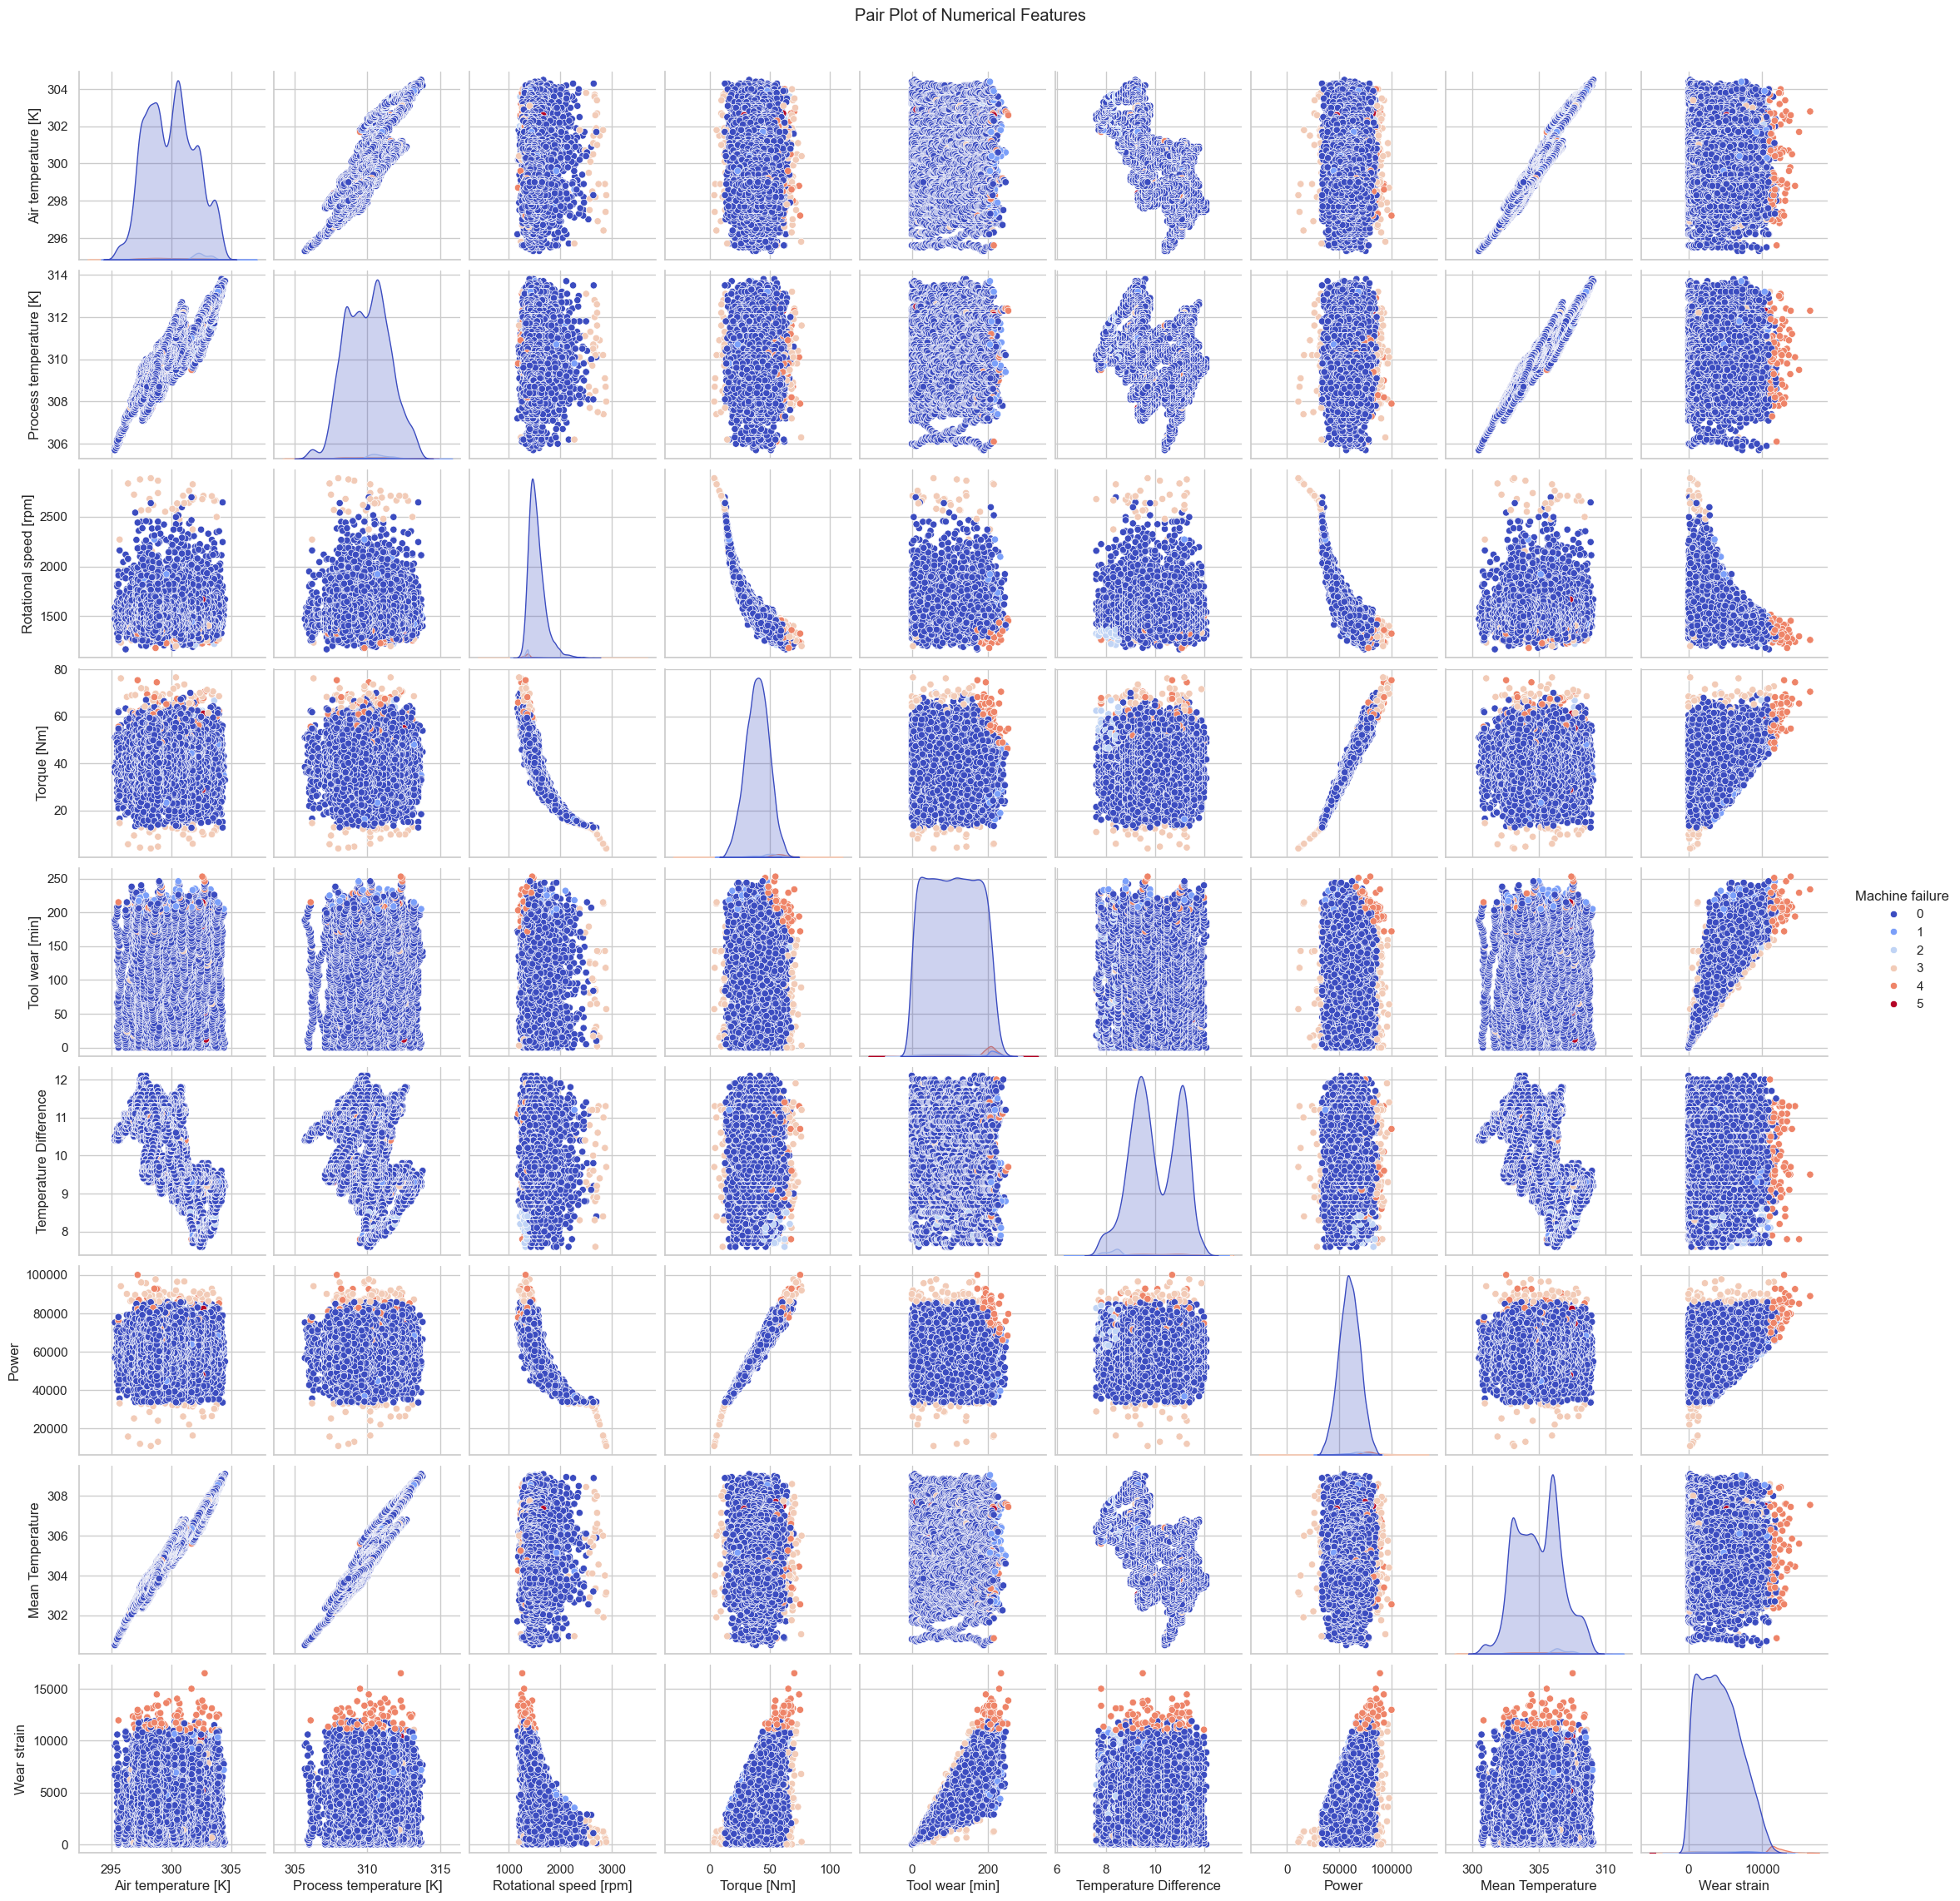

In [24]:

numerical_features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]','Torque [Nm]',
            'Tool wear [min]', 'Temperature Difference', 'Power','Mean Temperature', 'Wear strain']

target = 'Machine failure'
# Function to visualize pair plots for numerical features with respect to the target variable
def plot_pairplots(data, features, target):
    sns.pairplot(data, vars=features, hue=target, palette='coolwarm', diag_kind='kde')
    plt.suptitle('Pair Plot of Numerical Features', y=1.02)
    plt.show()


plot_pairplots(df, numerical_features, target)

In these graphs , Most Machine failure occurs When Torque [Nm] value is high and Rotational speed [rpm] is also high

## Correlation Analysis

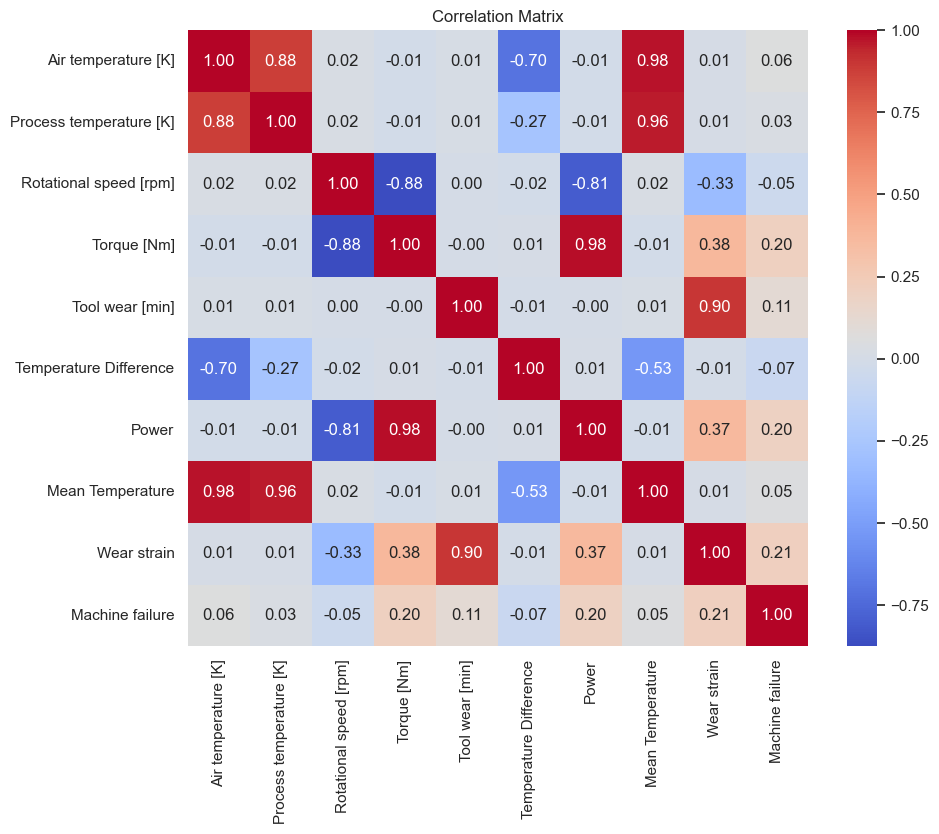

In [25]:
numerical_features=['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]','Temperature Difference', 'Power', 'Mean Temperature'
       , 'Wear strain','Machine failure']
df_numerical = df[numerical_features]

corr_matrix = df_numerical.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [26]:
#user defined function to encode the values
dic={'M':1, 'L':2, 'H':3}

def change(x):
    return int(dic[x])



In [27]:
df['Type']=df['Type'].apply(change)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     10000 non-null  int64  
 1   Air temperature [K]      10000 non-null  float64
 2   Process temperature [K]  10000 non-null  float64
 3   Rotational speed [rpm]   10000 non-null  int64  
 4   Torque [Nm]              10000 non-null  float64
 5   Tool wear [min]          10000 non-null  int64  
 6   Machine failure          10000 non-null  int64  
 7   Temperature Difference   10000 non-null  float64
 8   Power                    10000 non-null  float64
 9   Mean Temperature         10000 non-null  float64
 10  Wear strain              10000 non-null  float64
dtypes: float64(7), int64(4)
memory usage: 859.5 KB


In [29]:
df.head()

Type  Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0     1                298.1                    308.6                    1551   
1     2                298.2                    308.7                    1408   
2     2                298.1                    308.5                    1498   
3     2                298.2                    308.6                    1433   
4     2                298.2                    308.7                    1408   

   Torque [Nm]  Tool wear [min]  Machine failure  Temperature Difference  \
0         42.8                0                0                    10.5   
1         46.3                3                0                    10.5   
2         49.4                5                0                    10.4   
3         39.5                7                0                    10.4   
4         40.0                9                0                    10.5   

     Power  Mean Temperature  Wear strain  
0  66382.8            303.35          0.0  
1  65190.4            303.45        138.9  
2  74001.2            303.30        247.0  
3  56603.5            303.40        276.5  
4  56320.0            303.45        360.0

In [30]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

features=['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
        'Temperature Difference', 'Power',
       'Mean Temperature', 'Wear strain']

# Apply Min-Max scaling
df[features] = scaler.fit_transform(df[features])

print(" after Min-Max Scaling:")
df.head()


 after Min-Max Scaling:


Type  Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0     1             0.304348                 0.358025                0.222934   
1     2             0.315217                 0.370370                0.139697   
2     2             0.304348                 0.345679                0.192084   
3     2             0.315217                 0.358025                0.154249   
4     2             0.315217                 0.370370                0.139697   

   Torque [Nm]  Tool wear [min]  Machine failure  Temperature Difference  \
0     0.535714         0.000000                0                0.644444   
1     0.583791         0.011858                0                0.644444   
2     0.626374         0.019763                0                0.622222   
3     0.490385         0.027668                0                0.622222   
4     0.497253         0.035573                0                0.644444   

      Power  Mean Temperature  Wear strain  
0  0.622557          0.331395     0.000000  
1  0.609161          0.343023     0.008420  
2  0.708143          0.325581     0.014972  
3  0.512694          0.337209     0.016761  
4  0.509509          0.343023     0.021822

In [255]:
#df.to_csv('Predictive_Maintenance_Binary_Model.csv')

In [31]:
df.to_csv('Predictive_Maintenance_Model.csv')